In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [2]:
#Variables that contains the user credentials to access Twitter API 
access_token = "164629846-7molrihvswyFG0eY7YQoanU8fNZxV51DLL39lMUK"
access_token_secret = "Qio7a95S1zgotg6AcirbumyyrHTAgezYn0o6FBex9hT77"
consumer_key = "jt8JvXvvhDm0VlrfSGuKFsnn9"
consumer_secret = "tzfFUZr5esq1zeStzDuzYf5u7kyoK41Jto9dEEtFRh9muCMv2T"

In [5]:
# Basic Listener that just prints recieved tweets to stdout
class StdOutListener(StreamListener):
    def on_data(self,data):
        print data
        return True
    def on_error(self,status):
        print status

In [6]:
if __name__=='__main__':
    l=StdOutListener()
    auth=OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    stream=Stream(auth,l)
    
    #
    stream.filter(track=['python','java'])

/usr/local/lib/python2.7/dist-packages/urllib3/util/ssl_.py:137: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


{"created_at":"Wed Sep 13 06:25:46 +0000 2017","id":907852788285235201,"id_str":"907852788285235201","text":"RT @Ngozi46138137: @NkirukaNistoran @DonaldJTrumpJr @Amaka_Ekwo_IPOB #Biafrans life's are in danger intl communities should intervene https\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4011786921,"id_str":"4011786921","name":"Nwachukwu Mmaduabuch","screen_name":"NMmaduabuch","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1513,"friends_count":1292,"listed_count":69,"favourites_count":24688,"statuses_count":188429,"created_at":"Wed Oct 21 20:06:25 +0000 2015","utc_offset":-25200,"time_zone":"Pacific Time (US & Canada)","geo_enabled":false,"l

{"created_at":"Wed Sep 13 06:25:50 +0000 2017","id":907852806874419200,"id_str":"907852806874419200","text":"Logical Logic - An Introduction into Sophisticated Grammars using Python","source":"\u003ca href=\"http:\/\/cheapbotsdonequick.com\" rel=\"nofollow\"\u003eCheap Bots, Done Quick!\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":769073849182846976,"id_str":"769073849182846976","name":"essllibot","screen_name":"Essllibot","location":"Bolzano\/Bozen","url":null,"description":"This is a Twitter bot developed during the 'Natural Language Processing of Microblogs' course at the ESSLLI 2016 in Bolzano.","translator_type":"none","protected":false,"verified":false,"followers_count":11,"friends_count":9,"listed_count":1,"favourites_count":3,"statuses_count":10144,"created_at":"Fri Aug 26 07:27:49 +0000 2016","utc_offset":null,"time_zone":null

{"created_at":"Wed Sep 13 06:25:51 +0000 2017","id":907852809231589376,"id_str":"907852809231589376","text":"Siasia warns Federal Government, says United Nations is monitoring Operation Python Dance: https:\/\/t.co\/jjx862Ug1g","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4343201560,"id_str":"4343201560","name":"Raymondpeter Uwaezuo","screen_name":"RUwaezuo","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":18,"friends_count":95,"listed_count":0,"favourites_count":3,"statuses_count":26,"created_at":"Tue Dec 01 20:05:16 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_

KeyboardInterrupt: 

In [66]:
# Understanding Twittes
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [67]:
tweets_data_path = 'rayen.txt'

In [68]:
tweets_data=[]
tweets_file=open(tweets_data_path,'r')

for line in tweets_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [69]:
print(len(tweets_data))


217


In [70]:
tweets = pd.DataFrame(tweets_data)

In [71]:
print tweets

    contributors coordinates                      created_at  \
0           None        None  Wed Sep 13 06:27:12 +0000 2017   
1           None        None  Wed Sep 13 06:27:17 +0000 2017   
2           None        None  Wed Sep 13 06:27:34 +0000 2017   
3           None        None  Wed Sep 13 06:27:42 +0000 2017   
4           None        None  Wed Sep 13 06:27:56 +0000 2017   
5           None        None  Wed Sep 13 06:28:43 +0000 2017   
6           None        None  Wed Sep 13 06:29:05 +0000 2017   
7           None        None  Wed Sep 13 06:29:07 +0000 2017   
8           None        None  Wed Sep 13 06:29:20 +0000 2017   
9           None        None  Wed Sep 13 06:29:29 +0000 2017   
10          None        None  Wed Sep 13 06:29:37 +0000 2017   
11          None        None  Wed Sep 13 06:30:03 +0000 2017   
12          None        None  Wed Sep 13 06:30:20 +0000 2017   
13          None        None  Wed Sep 13 06:30:29 +0000 2017   
14          None        None  Wed Sep 13

In [72]:
tweets['text']=map(lambda tweet:tweet['text'] if tweet['text'] != None else None,tweets_data)

tweets['lang']=map(lambda tweet:tweet['lang'] if tweet['lang'] != None else None,tweets_data)
tweets['country']=map(lambda tweet:tweet['place']['country'] if tweet['place'] != None else None,tweets_data)

In [73]:
tweets['text']

0      NCP workers protest outside Ryan International...
1      डीईओ और आईजी ने ली स्कूल प्रबंधकों की बैठक htt...
2      #Judicial system is the only hope from corrupt...
3      In Mumbai! Next time when NCPian tards talk ab...
4      RT @AnupamConnects: It should be made mandator...
5      RT @bhaskar_vats: #RyanSchoolMurder : Postmort...
6      RT @Realbirth_2012: #PradyumnWantsJustice\n#जग...
7      #PradyumnaMurderCase : #rayaninternationalscho...
8      #RyanSchoolMurder: Transit anticipatory bail a...
9      RT @htTweets: #RyanSchoolMurder: Transit antic...
10     RT @kabirputra: #PradyumnWantsJustice\n#जगतगुर...
11     RT @RituRathaur: The best CBSE can do is revok...
12     RT @htTweets: #RyanSchoolMurder: Transit antic...
13     RT @RituRathaur: The best CBSE can do is revok...
14             #RyanSchoolMurder https://t.co/TvUGo0A5y7
15     RT @GANESHYY2796298: #PradyumnWantsJustice\n#ज...
16         #PradyumnWantsJustice https://t.co/AHwbN5W6rn
17     गुड़गांव मर्डर: आरोपी का

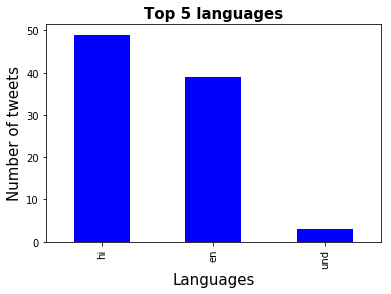

In [54]:
# Tweets by Language
tweets_by_lang = tweets['lang'].value_counts()

fig,ax=plt.subplots()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax,kind='bar',color='blue')

In [45]:
# Tweets By Country
tweets_by_country=tweets['country'].value_counts()
tweets_by_country

Series([], Name: country, dtype: int64)

TypeError: Empty 'DataFrame': no numeric data to plot

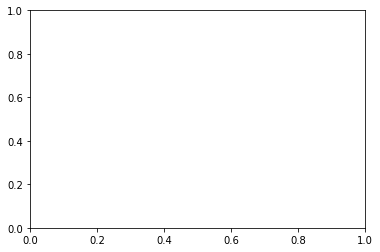

In [46]:
fig,aux = plt.subplots()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
tweets_by_country[:5].plot(ax=ax,kind='bar',color='blue')

In [1]:
from pymongo import MongoClient


In [5]:
client = MongoClient()
db = client.Tweets

In [6]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'Tweets')

In [10]:
db.Stream.insert_one({"address": {
            "street": "2 Avenue",
            "zipcode": "10075",
            "building": "1480",
            "coord": [-73.9557413, 40.7720266]
        }})

In [63]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p = figure(x_range=fruits, plot_height=350, toolbar_location=None, title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, source=source, legend="fruits",
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)